# Exercice 2 - System evaluation

## Imports

In [20]:
import pandas as pd
import numpy as np

## Load data

Define the path of the data file

In [21]:
path = "ex2-system-a.csv"

Read the CSV file using `read_csv`

In [22]:
dataset_a = pd.read_csv(path, sep=";", index_col=False, names=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "y_true"])

Display first rows

In [23]:
dataset_a.head()

,0,1,2,3,4,5,6,7,8,9,y_true
0,5.348450e-08,7.493480e-10,8.083470e-07,2.082290e-05,5.222360e-10,2.330260e-08,5.241270e-12,9.999650e-01,4.808590e-07,0.000013,7
1,1.334270e-03,3.202960e-05,8.504280e-01,1.669090e-03,1.546460e-07,2.412940e-04,1.448280e-01,1.122810e-11,1.456330e-03,0.000011,2
2,3.643050e-06,9.962760e-01,2.045910e-03,4.210530e-04,2.194020e-05,1.644130e-05,2.838160e-04,3.722960e-04,5.150120e-04,0.000044,1
3,9.998200e-01,2.550390e-10,1.112010e-05,1.653200e-05,5.375730e-10,8.999750e-05,9.380920e-06,4.464470e-05,2.418440e-06,0.000006,0
4,2.092460e-08,7.464220e-08,3.560820e-05,5.496200e-07,9.988960e-01,3.070920e-08,2.346150e-04,9.748010e-07,1.071610e-06,0.000831,4


Store some useful statistics (class names + number of classes)

In [24]:
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
nb_classes = len(class_names)

## Exercise's steps

a) Write a function to take classification decisions on such outputs according to Bayes’rule.

In [25]:
def bayes_classification(df):
    """
    Take classification decisions according to Bayes rule.
        
    Parameters
    ----------
    df : Pandas DataFrame of shape (n_samples, n_features + ground truth)
         Dataset.
         
    Returns
    -------
    preds : Numpy array of shape (n_samples,)
            Class labels for each data sample.
    """
    pred = np.ndarray(shape=(df.shape[0]), dtype=int)
    for i in range(df.shape[0]):
        pred[i] = np.argmax(df.iloc[i, 0:10])
    return pred

b) What is the overall error rate of the system ?

In [26]:
# Your code here: compute and print the error rate of the system
preds = bayes_classification(dataset_a)
print("Error rate: ", np.sum(preds != dataset_a["y_true"]) / dataset_a.shape[0])

Error rate:  0.1073


c) Compute and report the confusion matrix of the system.

In [27]:
def confusion_matrix(y_true, y_pred, n_classes):
    """
    Compute the confusion matrix.
        
    Parameters
    ----------
    y_true : Numpy array of shape (n_samples,)
             Ground truth.
    y_pred : Numpy array of shape (n_samples,)
             Predictions.
    n_classes : Integer
                Number of classes.
         
    Returns
    -------
    cm : Numpy array of shape (n_classes, n_classes)
         Confusion matrix.
    """
    cm = np.zeros(shape=(n_classes, n_classes))
    for i in range(n_classes):
         for j in range(n_classes):
             for k in range(y_true.shape[0]):
                 if y_true[k] == i and y_pred[k] == j:
                     cm[i, j] += 1
    return cm

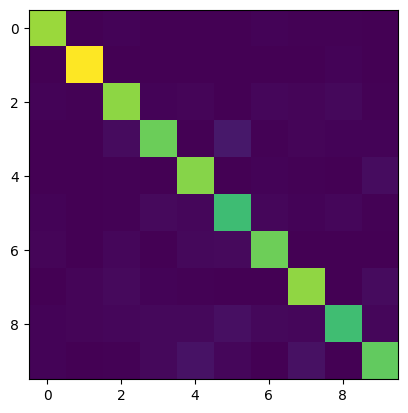

In [30]:
# Your code here: compute and print the confusion matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(dataset_a["y_true"], preds, nb_classes)

plt.imshow(cm, interpolation='nearest')
plt.show()

d) What are the worst and best classes in terms of precision and recall ?

In [29]:
def precision_per_class(cm):
    """
    Compute the precision per class.
        
    Parameters
    ----------
    cm : Numpy array of shape (n_classes, n_classes)
         Confusion matrix.
         
    Returns
    -------
    precisions : Numpy array of shape (n_classes,)
                 Precision per class.
    """
    precisions = np.zeros(shape=(cm.shape[0]))
    for i in range(cm.shape[0]):
        precisions[i] = cm[i, i] / np.sum(cm[:, i])
    return precisions

In [12]:
def recall_per_class(cm):
    """
    Compute the recall per class.
        
    Parameters
    ----------
    cm : Numpy array of shape (n_classes, n_classes)
         Confusion matrix.
         
    Returns
    -------
    recalls : Numpy array of shape (n_classes,)
              Recall per class.
    """
    recalls = np.zeros(shape=cm.shape[0])
    for i in range(cm.shape[0]):
          recalls[i] = cm[i, i] / np.sum(cm[i, :])
    return recalls

In [13]:
# Your code here: find and print the worst and best classes in terms of precision
precisions = precision_per_class(cm)
print("Worst class in terms of precision: ", np.argmin(precisions))
print("Best class in terms of precision: ", np.argmax(precisions))

Worst class in terms of precision:  5
Best class in terms of precision:  1


In [14]:
# Your code here: find and print the worst and best classes in terms of recall
recalls = recall_per_class(cm)
print("Worst class in terms of recall: ", np.argmin(recalls))
print("Best class in terms of recall: ", np.argmax(recalls))

Worst class in terms of recall:  8
Best class in terms of recall:  1


e) In file `ex1-system-b.csv` you find the output of a second system B. What is the best system between (a) and (b) in terms of error rate and F1.

In [31]:
# Your code here: load the data of the system B
path = "ex2-system-b.csv"
dataset_b = pd.read_csv(path, sep=";", index_col=False, names=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "y_true"])

In [32]:
def system_accuracy(cm):
    """
    Compute the system accuracy.
        
    Parameters
    ----------
    cm : Numpy array of shape (n_classes, n_classes)
         Confusion matrix.
         
    Returns
    -------
    accuracy : Float
               Accuracy of the system.
    """
    return np.sum(np.diag(cm)) / np.sum(cm)

In [33]:
def system_f1_score(cm):
    """
    Compute the system F1 score.
        
    Parameters
    ----------
    cm : Numpy array of shape (n_classes, n_classes)
         Confusion matrix.
         
    Returns
    -------
    f1_score : Float
               F1 score of the system.
    """
    precisions = precision_per_class(cm)
    recalls = recall_per_class(cm)
    return 2 * np.sum(precisions * recalls) / (np.sum(precisions) + np.sum(recalls))

In [34]:
# Your code here: compute and print the accuracy and the F1 score of the system A
cm_a = confusion_matrix(dataset_a["y_true"], preds, nb_classes)
print("Accuracy of system A: ", system_accuracy(cm_a))
print("F1 score of system A: ", system_f1_score(cm_a))

Accuracy of system A:  0.8927
F1 score of system A:  0.8925564096466467


In [35]:
# Your code here: compute and print the accuracy and the F1 score of the system B
preds_b = bayes_classification(dataset_b)
cm_b = confusion_matrix(dataset_b["y_true"], preds_b, nb_classes)
print("Accuracy of system B: ", system_accuracy(cm_b))
print("F1 score of system B: ", system_f1_score(cm_b))

Accuracy of system B:  0.9613
F1 score of system B:  0.9609963939749347
